# Titanic survival data for kaggle competetion

# import libraries

In [172]:
import pandas as pd
import numpy as np

# Get the train and test data 

In [173]:
titanicdata=pd.read_csv('train.csv')
titanictest=pd.read_csv('test.csv')

In [174]:
titanicdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [175]:
titanictest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# droping of unusal data from datasets

##in both train and test data have name, ticket and cabin which will not effect data 

In [176]:
titanictest.shape

(418, 11)

### data preprocessing

In [177]:
titanic=titanicdata.drop(['Name','Ticket','Cabin'],axis=1)

In [178]:
titanict=titanictest.drop(['Name','Ticket','Cabin'],axis=1)

In [179]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [180]:
titanict.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


### find the isnull values of the columns and make mean of them and fill in the data

In [181]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [182]:
titanict.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [183]:
titanic.Age.mean()

29.69911764705882

In [184]:
titanic.Age.fillna(titanic.Age.mean(),inplace=True)

In [185]:
titanic[titanic.Age.isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [186]:
titanict.Age.mean()

30.272590361445783

In [187]:
titanict.Age.fillna(titanict.Age.mean(),inplace=True)

In [188]:
titanict[titanict.Age.isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [189]:
titanict.Fare.mean()

35.6271884892086

In [190]:
titanict.Fare.fillna(titanic.Fare.mean(),inplace=True)

In [191]:
titanict[titanict.Fare.isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [192]:
titanic[titanic.Embarked.isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,female,38.0,0,0,80.0,NaN
829,830,1,1,female,62.0,0,0,80.0,NaN


In [193]:
titanicd=titanic.dropna()

In [194]:
titanicd.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [195]:
titanicd[titanicd.Embarked.isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


### do get dummies fro some columns and mapping for some 

In [196]:
titanicd=pd.get_dummies(titanicd,columns=['Sex'])
titanicd.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,22.0,1,0,7.2500,S,0,1
1,2,1,1,38.0,1,0,71.2833,C,1,0
2,3,1,3,26.0,0,0,7.9250,S,1,0
3,4,1,1,35.0,1,0,53.1000,S,1,0
4,5,0,3,35.0,0,0,8.0500,S,0,1


In [197]:
titanict=pd.get_dummies(titanict,columns=['Sex'])
titanict.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,892,3,34.5,0,0,7.8292,Q,0,1
1,893,3,47.0,1,0,7.0000,S,1,0
2,894,2,62.0,0,0,9.6875,Q,0,1
3,895,3,27.0,0,0,8.6625,S,0,1
4,896,3,22.0,1,1,12.2875,S,1,0


In [198]:
Port={'S':1,'C':2,'Q':3}

In [199]:
titanicd['Embarked']  = titanicd['Embarked'].map(Port)

In [200]:
titanicd.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,2,1,0
2,3,1,3,26.0,0,0,7.9250,1,1,0
3,4,1,1,35.0,1,0,53.1000,1,1,0
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [201]:
port={'S':1,'C':2,'Q':3}

In [202]:
titanict['Embarked']=titanict['Embarked'].map(port)

In [203]:
titanict.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,892,3,34.5,0,0,7.8292,3,0,1
1,893,3,47.0,1,0,7.0000,1,1,0
2,894,2,62.0,0,0,9.6875,3,0,1
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,1,1,0


In [204]:
titanict.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Sex_female     0
Sex_male       0
dtype: int64

In [205]:
testtitanic.shape

(417, 9)

### split x and y as test and train 

In [206]:
x=titanicd.drop('Survived',axis=1)
y=titanicd['Survived']

In [207]:
x.shape

(889, 9)

### built random forest model

In [208]:
from sklearn import tree

In [209]:
from sklearn.ensemble import RandomForestClassifier
rf_tree=RandomForestClassifier(n_estimators=100)

In [210]:
rf_tree.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [211]:
from sklearn.model_selection import train_test_split

In [212]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=22)

In [213]:
rf_tree.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [214]:
y_test_pred=rf_tree.predict(x_test)

In [215]:
from sklearn import metrics

In [216]:
accuracy_before=metrics.accuracy_score(y_test,y_test_pred)
accuracy_before

0.7827715355805244

In [217]:
from sklearn.model_selection import RandomizedSearchCV

In [218]:
rf_tree=RandomForestClassifier(n_estimators=100)
param_grid={'n_estimators':[100,500],
            'criterion'   :['gini','entropy'],
            'max_features' :[5,6,7],
            'max_depth'    :[16,22,34,45,56],
            'min_samples_leaf':[13,24],
           }


In [219]:
random_rf=RandomizedSearchCV(rf_tree,n_iter=10,param_distributions=param_grid,scoring="accuracy",verbose=2, cv=5)
random_rf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=500, min_samples_leaf=24, max_features=7, max_depth=16, criterion=entropy 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=500, min_samples_leaf=24, max_features=7, max_depth=16, criterion=entropy, total=   0.3s
[CV] n_estimators=500, min_samples_leaf=24, max_features=7, max_depth=16, criterion=entropy 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  n_estimators=500, min_samples_leaf=24, max_features=7, max_depth=16, criterion=entropy, total=   0.3s
[CV] n_estimators=500, min_samples_leaf=24, max_features=7, max_depth=16, criterion=entropy 
[CV]  n_estimators=500, min_samples_leaf=24, max_features=7, max_depth=16, criterion=entropy, total=   0.3s
[CV] n_estimators=500, min_samples_leaf=24, max_features=7, max_depth=16, criterion=entropy 
[CV]  n_estimators=500, min_samples_leaf=24, max_features=7, max_depth=16, criterion=entropy, total=   0.3s
[CV] n_estimators=500, min_samples_leaf=24, max_features=7, max_depth=16, criterion=entropy 
[CV]  n_estimators=500, min_samples_leaf=24, max_features=7, max_depth=16, criterion=entropy, total=   0.3s
[CV] n_estimators=100, min_samples_leaf=24, max_features=7, max_depth=16, criterion=gini 
[CV]  n_estimators=100, min_samples_leaf=24, max_features=7, max_depth=16, criterion=gini, total=   0.0s
[CV] n_estimators=100, min_samples_leaf=24, max_features=7, max_depth=16, criterion=gini 
[CV]

[CV]  n_estimators=100, min_samples_leaf=24, max_features=7, max_depth=45, criterion=entropy, total=   0.0s
[CV] n_estimators=500, min_samples_leaf=24, max_features=6, max_depth=45, criterion=entropy 
[CV]  n_estimators=500, min_samples_leaf=24, max_features=6, max_depth=45, criterion=entropy, total=   0.3s
[CV] n_estimators=500, min_samples_leaf=24, max_features=6, max_depth=45, criterion=entropy 
[CV]  n_estimators=500, min_samples_leaf=24, max_features=6, max_depth=45, criterion=entropy, total=   0.3s
[CV] n_estimators=500, min_samples_leaf=24, max_features=6, max_depth=45, criterion=entropy 
[CV]  n_estimators=500, min_samples_leaf=24, max_features=6, max_depth=45, criterion=entropy, total=   0.3s
[CV] n_estimators=500, min_samples_leaf=24, max_features=6, max_depth=45, criterion=entropy 
[CV]  n_estimators=500, min_samples_leaf=24, max_features=6, max_depth=45, criterion=entropy, total=   0.3s
[CV] n_estimators=500, min_samples_leaf=24, max_features=6, max_depth=45, criterion=entr

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   12.2s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [100, 500], 'criterion': ['gini', 'entropy'], 'max_features': [5, 6, 7], 'max_depth': [16, 22, 34, 45, 56], 'min_samples_leaf': [13, 24]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=2)

### accuracy after the tuning 

In [220]:
random_final_model=random_rf.best_estimator_
y_pred=random_final_model.predict(x_test)
metrics.accuracy_score(y_pred, y_test)

0.7677902621722846

In [222]:
titanicd.loc[:,['Age', 'Fare']].describe()

,Age,Fare
count,889.000000,889.000000
mean,29.653446,32.096681
std,12.968366,49.697504
min,0.420000,0.000000
25%,22.000000,7.895800
50%,29.699118,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


In [223]:
titanicd['Fare'] = pd.cut(x = titanicd.Fare, bins = 17, labels = range(17))
titanicd['Age'] = pd.cut(x = titanicd.Age, bins = 8, labels = range(8))

In [224]:
x=titanicd.drop('Survived',axis=1)
y=titanicd['Survived']

In [225]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 22)

In [226]:
rf_tree.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [227]:
y_test_pred=rf_tree.predict(x_test)

In [228]:
from sklearn import metrics

In [229]:
metrics.accuracy_score(y_test,y_test_pred)

0.7715355805243446

### make submission file of the model using the test data

In [230]:
Survived=rf_tree.predict(titanict)

In [231]:
submission=pd.DataFrame({'PassengerId':titanict.PassengerId,'Survived':Survived})

In [232]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


### decision tree

In [234]:
from sklearn import tree
from sklearn import metrics
ctree=tree.DecisionTreeClassifier()
ctree.fit(x_train,y_train)
y_test_pred=ctree.predict(x_test)
metrics.accuracy_score(y_test,y_test_pred)

0.7490636704119851

In [235]:
titanicd.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,2,1,0,0,1,0,1
1,2,1,1,3,1,0,2,2,1,0
2,3,1,3,2,0,0,0,1,1,0
3,4,1,1,3,1,0,1,1,1,0
4,5,0,3,3,0,0,0,1,0,1


In [236]:
x=titanicd.drop('Survived',axis=1)
y=titanicd['Survived']

In [237]:
x.shape

(889, 9)

In [238]:
x.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,1,3,2,1,0,0,1,0,1
1,2,1,3,1,0,2,2,1,0
2,3,3,2,0,0,0,1,1,0
3,4,1,3,1,0,1,1,1,0
4,5,3,3,0,0,0,1,0,1


### knn model

In [239]:
from sklearn.preprocessing import scale

In [240]:
from sklearn.neighbors import KNeighborsClassifier

In [241]:
knn = KNeighborsClassifier()
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [242]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=22)

In [243]:
knn_fit = knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [244]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.6142322097378277

In [245]:
knn_range = list(range(1,40))
scores = []

for k in knn_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(format(metrics.accuracy_score(y_test, y_pred), '.2f'))

print(scores)

['0.58', '0.59', '0.58', '0.58', '0.61', '0.60', '0.59', '0.58', '0.60', '0.59', '0.57', '0.58', '0.60', '0.58', '0.57', '0.59', '0.59', '0.60', '0.60', '0.59', '0.58', '0.59', '0.58', '0.59', '0.57', '0.59', '0.59', '0.58', '0.59', '0.59', '0.60', '0.59', '0.60', '0.60', '0.60', '0.59', '0.59', '0.59', '0.60']


Text(0, 0.5, 'testing accuracy')

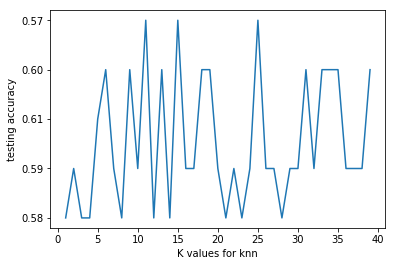

In [246]:
#find the k value by ploting the graph
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(knn_range, scores)
plt.xlabel('K values for knn')
plt.ylabel('testing accuracy')  # K=8 showing 97% accuracy

In [247]:
from sklearn.model_selection import GridSearchCV
knn_model = KNeighborsClassifier()

param_grid = { "n_neighbors"      : [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]             
                }

optimized_knn = GridSearchCV(knn_model, param_grid, scoring='accuracy', cv=5 )
optimized_knn.fit(x_train, y_train)

C:\Users\bunny\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [1]:
#accuracy 
optimized_knn.best_score_

NameError: name 'optimized_knn' is not defined

In [249]:
import pandas as pd
import numpy as np

In [252]:
submission.to_csv('titanic_submission.csv',index=None)